<a href="https://colab.research.google.com/github/seepala98/EVA-4/blob/master/PHASE_1/S7/base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S7/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/S7


# Import Library

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import load_transform
# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


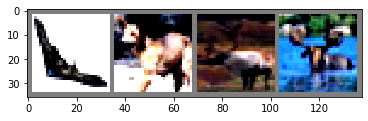

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
import model

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
model = model.Net().to(device)
summary(model, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14      

# Loss Function and optimization

In [0]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

# train and test

In [0]:
import train 
import validation


In [9]:
losses = []
accuracies = []

epochs = 70
for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train.train(model, load_transform.train_loader, device, optimizer, criterion)
    validation.val(model, load_transform.val_loader, device, criterion, losses, accuracies)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0194, Accuracy: 1791/10000 (17.91%)

Epoch 2:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0141, Accuracy: 3340/10000 (33.40%)

Epoch 3:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0121, Accuracy: 4362/10000 (43.62%)

Epoch 4:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0125, Accuracy: 4204/10000 (42.04%)

Epoch 5:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0115, Accuracy: 4752/10000 (47.52%)

Epoch 6:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0107, Accuracy: 5000/10000 (50.00%)

Epoch 7:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0100, Accuracy: 5408/10000 (54.08%)

Epoch 8:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0099, Accuracy: 5456/10000 (54.56%)

Epoch 9:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0095, Accuracy: 5642/10000 (56.42%)

Epoch 10:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0095, Accuracy: 5606/10000 (56.06%)

Epoch 11:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0096, Accuracy: 5484/10000 (54.84%)

Epoch 12:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0099, Accuracy: 5350/10000 (53.50%)

Epoch 13:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0094, Accuracy: 5718/10000 (57.18%)

Epoch 14:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0093, Accuracy: 5743/10000 (57.43%)

Epoch 15:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 6312/10000 (63.12%)

Epoch 16:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 6377/10000 (63.77%)

Epoch 17:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 6034/10000 (60.34%)

Epoch 18:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0083, Accuracy: 6352/10000 (63.52%)

Epoch 19:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0086, Accuracy: 6083/10000 (60.83%)

Epoch 20:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 6398/10000 (63.98%)

Epoch 21:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 6261/10000 (62.61%)

Epoch 22:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 6477/10000 (64.77%)

Epoch 23:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 6541/10000 (65.41%)

Epoch 24:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 6578/10000 (65.78%)

Epoch 25:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0081, Accuracy: 6367/10000 (63.67%)

Epoch 26:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 6984/10000 (69.84%)

Epoch 27:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 6684/10000 (66.84%)

Epoch 28:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 6876/10000 (68.76%)

Epoch 29:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0074, Accuracy: 6645/10000 (66.45%)

Epoch 30:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 6624/10000 (66.24%)

Epoch 31:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 6760/10000 (67.60%)

Epoch 32:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 6565/10000 (65.65%)

Epoch 33:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 6587/10000 (65.87%)

Epoch 34:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0076, Accuracy: 6747/10000 (67.47%)

Epoch 35:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0075, Accuracy: 6760/10000 (67.60%)

Epoch 36:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 6893/10000 (68.93%)

Epoch 37:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 6651/10000 (66.51%)

Epoch 38:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 6963/10000 (69.63%)

Epoch 39:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7190/10000 (71.90%)

Epoch 40:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 7153/10000 (71.53%)

Epoch 41:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7144/10000 (71.44%)

Epoch 42:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 6882/10000 (68.82%)

Epoch 43:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 6971/10000 (69.71%)

Epoch 44:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 6783/10000 (67.83%)

Epoch 45:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 6840/10000 (68.40%)

Epoch 46:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 7186/10000 (71.86%)

Epoch 47:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 6972/10000 (69.72%)

Epoch 48:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 7356/10000 (73.56%)

Epoch 49:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 7017/10000 (70.17%)

Epoch 50:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7235/10000 (72.35%)

Epoch 51:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0061, Accuracy: 7356/10000 (73.56%)

Epoch 52:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 7176/10000 (71.76%)

Epoch 53:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 6991/10000 (69.91%)

Epoch 54:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7163/10000 (71.63%)

Epoch 55:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 7379/10000 (73.79%)

Epoch 56:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 7259/10000 (72.59%)

Epoch 57:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 7107/10000 (71.07%)

Epoch 58:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 7190/10000 (71.90%)

Epoch 59:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7209/10000 (72.09%)

Epoch 60:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 7308/10000 (73.08%)

Epoch 61:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 7198/10000 (71.98%)

Epoch 62:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 7002/10000 (70.02%)

Epoch 63:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 7419/10000 (74.19%)

Epoch 64:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 7090/10000 (70.90%)

Epoch 65:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7133/10000 (71.33%)

Epoch 66:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 7245/10000 (72.45%)

Epoch 67:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 7161/10000 (71.61%)

Epoch 68:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 7040/10000 (70.40%)

Epoch 69:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 7347/10000 (73.47%)

Epoch 70:


Loss=0.54 Batch ID=390 Accuracy=77.70: 100%|██████████| 391/391 [00:12<00:00, 30.82it/s]



Validation set: Average loss: 0.0065, Accuracy: 7200/10000 (72.00%)



# Plot Result

In [0]:
%matplotlib inline
import plot

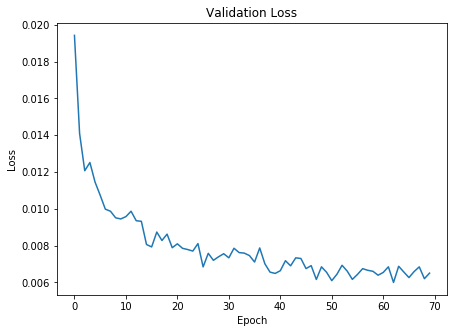

In [11]:
plot.plot_metric(losses, 'Loss')

# Plot Accuracy

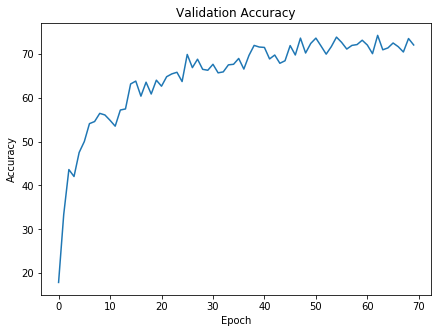

In [12]:
plot.plot_metric(accuracies, 'Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    car   cat  bird horse


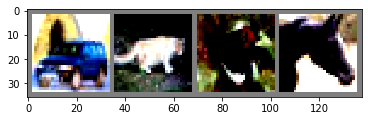

In [13]:
dataiter = iter(load_transform.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = model(images.cuda())

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    car  deer  frog   cat


# Result Analysis


In [16]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for _, (images, labels) in enumerate(load_transform.val_loader, 0):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 79 %
Accuracy of  bird : 78 %
Accuracy of   cat : 61 %
Accuracy of  deer : 73 %
Accuracy of   dog : 63 %
Accuracy of  frog : 79 %
Accuracy of horse : 53 %
Accuracy of  ship : 95 %
Accuracy of truck : 64 %
